# INTRODUCTION

In the past, people didn't know about bacteria, germs, or viruses. People illness was caused by "bad air" or evil spirits. But in the 1800s Doctors started looking more at anatomy, doing autopsies and making arguments based on data. Dr Semmelweis suspected that something was going wrong with the procedures at Vienna General Hospital. Dr Semmelweis wanted to figure out why so many women in maternity wards were dying from childbed fever (i.e., puerperal fever).

### IMPORT THE LIBRARIES

In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

from datetime import datetime

### LOAD THE DATA

In [237]:
df_yearly = pd.read_csv('sample_data/annual_deaths_by_clinic.csv')
df_monthly = pd.read_csv('sample_data/monthly_deaths.csv')

In [238]:
df_yearly.head()

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


In [239]:
df_monthly.head()

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


### Preliminary Data Exploration and Visualization

###### Size of the data:

In [240]:
print(df_yearly.shape)
print(df_monthly.shape)

(12, 4)
(98, 3)


###### Check for the data information:

In [241]:
df_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [242]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   births  98 non-null     int64 
 2   deaths  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


###### Check for duplicated values in any of the record

In [243]:
print(f'Is there duplicated values in the Yearly data?: {df_yearly.duplicated().values.any()}')
print(f'Is there duplicated values in the Monthly data?: {df_monthly.duplicated().values.any()}')

Is there duplicated values in the Yearly data?: False
Is there duplicated values in the Monthly data?: False


###### Statistical summary

In [244]:
df_yearly.describe()

,year,births,deaths
count,12.000000,12.000000,12.000000
mean,1843.500000,3152.750000,223.333333
std,1.783765,449.078476,145.383089
min,1841.000000,2442.000000,66.000000
25%,1842.000000,2901.750000,100.250000
50%,1843.500000,3108.500000,219.500000
75%,1845.000000,3338.250000,263.500000
max,1846.000000,4010.000000,518.000000


In [245]:
df_monthly.describe()

,births,deaths
count,98.000000,98.000000
mean,267.000000,22.469388
std,41.769372,18.141031
min,190.000000,0.000000
25%,242.500000,8.000000
50%,264.000000,16.500000
75%,292.750000,36.750000
max,406.000000,75.000000


###### Preliminary Exploration Result:
The following are the results from the preliminary exploration:

* There is no missing values in any of the data
* There is no duplicated records in the records.
* The date in the yearly and monthly data is suppose to be a datetime type instead of `int64` and `object` respectively.
* on average there were about 267 births and 22 deaths per month.

Changiging the type of date column ot yearly and monthly data

In [246]:
df_monthly.date = pd.to_datetime(df_monthly.date)

###### What is the percentage of women dying in childbirth?

In [247]:
prob = df_yearly.deaths.sum() / df_yearly.births.sum() * 100
print(f'Chances of dying in the 1840s in Vienna: {prob:.3}%')

Chances of dying in the 1840s in Vienna: 7.08%


In [248]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y') 

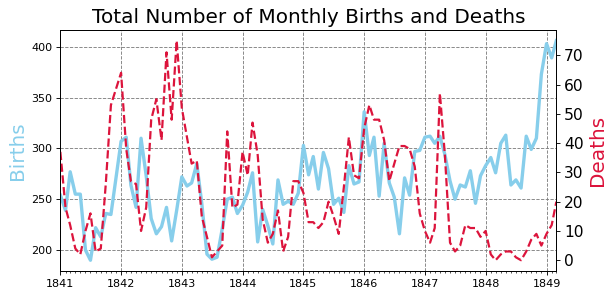

In [249]:
plt.figure(figsize=(8, 4), dpi=80)

plt.title('Total Number of Monthly Births and Deaths', fontsize=18)
 
ax1 = plt.gca()
ax2 = ax1.twinx()

plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
ax1.set_ylabel('Births', color='skyblue', fontsize=18)
ax2.set_ylabel('Deaths', color='crimson', fontsize=18)
 
ax1.grid(color='grey', linestyle='--')

# Use Locators
ax1.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
 
ax1.plot(df_monthly.date, 
         df_monthly.births, 
         color='skyblue', 
         linewidth=3)
 
ax2.plot(df_monthly.date, 
         df_monthly.deaths, 
         color='crimson', 
         linewidth=2, 
         linestyle='--')
 
plt.show()

What we seen from the plotabove is that something happened after 1847. The total number of deaths seems to have dropped, despite an increasing number of births!

### Analysing the Yearly Data Split By Clinic

There are two maternity wards at the Vienna General Hospital: clinic 1 and clinic 2. Clinic 1 was staffed by all-male doctors and medical students, and clinic 2 was staffed by female midwives.

###### The Yearly Data Split by Clinic

In [250]:
line = px.line(df_yearly, 
               x='year', 
               y='births',
               color='clinic',
               title='Total Yearly Births by Clinic')
 
line.show()

We see from the above plot that more and more women gave birth at the hospital over the years. Clinic 1, which was staffed by male doctors and medical students was also the busier or simply the larger ward. More births took place in clinic 1 than in clinic 2.

In [251]:
line = px.line(df_yearly, 
               x='year', 
               y='deaths',
               color='clinic',
               title='Total Yearly Deaths by Clinic')
 
line.show()

From the plot above, it also shows that, not only were more people born in clinic 1, more people also died in clinic 1.

###### Calculate the Proportion of Yearly Deaths to Birth at Each Clinic.

In [252]:
total_clinic_death = df_yearly.groupby('clinic', as_index=False).agg({'deaths': [np.sum, np.mean], 
                                                                      'births': [np.sum, np.mean]})
total_clinic_death


clinic deaths             births             
               sum        mean    sum         mean
0  clinic 1   1989  331.500000  20042  3340.333333
1  clinic 2    691  115.166667  17791  2965.166667

In [253]:
total_clinic_death['pct_deaths'] = total_clinic_death['deaths']['sum'] / total_clinic_death['births']['sum']
total_clinic_death  

clinic deaths             births              pct_deaths
               sum        mean    sum         mean           
0  clinic 1   1989  331.500000  20042  3340.333333   0.099242
1  clinic 2    691  115.166667  17791  2965.166667   0.038840

###### Calculate the Proportion of Deaths to Birth Per Year.

In [254]:
df_yearly['pct_deaths'] = df_yearly.deaths / df_yearly.births

In [255]:
df_yearly.head()

,year,births,deaths,clinic,pct_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015


In [256]:
line = px.line(df_yearly, 
               x='year', 
               y='pct_deaths',
               color='clinic',
               title='Proportion of Yearly Deaths by Clinic')
 
line.show()

Still, clinic 2 had a consistently lower death rate than clinic 1! This is what puzzled and frustrated Dr Semmelweis.

**The story continues...**

At first, Dr Semmelweis thought that the position of the women giving birth was the issue. In clinic 2, the midwives' clinic, women gave birth on their sides. In the doctors' clinic, women gave birth on their backs. So, Dr. Semmelweis, had women in the doctors' clinic give birth on their sides. However, this had no effect on the death rate.

Next, Dr Semmelweis noticed that whenever someone on the ward died, a priest would walk through clinic 1, past the women's beds ringing a bell. Perhaps the priest and the bell ringing terrified the women so much after birth that they developed a fever, got sick and died. Dr Semmelweis had the priest change his route and stop ringing the bell. Again, this had no effect.

At this point, Dr Semmelweis was so frustrated he went on holiday to Venice. Perhaps a short break would clear his head. When Semmelweis returned from his vacation, he was told that one of his colleagues, a pathologist, had fallen ill and died. His friend had pricked his finger while doing an autopsy on a woman who had died from childbed fever and subsequently got very sick himself and died. 

Looking at the pathologist's symptoms, Semmelweis realised the pathologist died from the same thing as the women he had autopsied.  This was his breakthrough: anyone could get sick from childbed fever, not just women giving birth!

This is what led to Semmelweis' new theory. Perhaps there were little pieces or particles of a corpse that the doctors and medical students were getting on their hands while dissecting the cadavers during an autopsy. And when the doctors delivered the babies in clinic 1, these particles would get inside the women giving birth who would then develop the disease and die.

In June 1846, Dr Semmelweis ordered everyone on his medical staff to start cleaning their hands and instruments not just with soap and water but with a chlorine solution (he didn't know it at the time, but chlorine is an amazing disinfectant). The reason Dr Semmelweis actually chose the chlorine was that he wanted to get rid of any smell on doctors' hands after an autopsy. No one knew anything about bacteria, germs or viruses at the time.


###### Calculate the Proportion of Deaths to Birth Per Month.

In [257]:
df_monthly['pct_deaths'] = df_monthly.deaths / df_monthly.births

In [258]:
df_monthly.head()

,date,births,deaths,pct_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


**Create two subsets from the df_monthly data: before and after Dr Semmelweis ordered washing hand.**

In [259]:
discovered_date = datetime.strptime('1846-06-01', '%Y-%m-%d')
discovered_date

datetime.datetime(1846, 6, 1, 0, 0)

In [260]:
determinant = df_monthly.date.apply(lambda x: 'discovered' if x>=discovered_date  else 'undiscovered')
 
df_monthly['discovered_handwashing'] = determinant

In [261]:
df_monthly.head()

,date,births,deaths,pct_deaths,discovered_handwashing
0,1841-01-01,254,37,0.145669,undiscovered
1,1841-02-01,239,18,0.075314,undiscovered
2,1841-03-01,277,12,0.043321,undiscovered
3,1841-04-01,255,4,0.015686,undiscovered
4,1841-05-01,255,2,0.007843,undiscovered


In [262]:
avg_death_1860 = df_monthly.groupby('discovered_handwashing', as_index=False).agg({'deaths': np.sum, 'births': np.sum})
avg_death_1860

,discovered_handwashing,deaths,births
0,discovered,486,9983
1,undiscovered,1716,16183


In [263]:
avg_death_1860['pct_deaths'] = avg_death_1860['deaths'] / avg_death_1860['births']
avg_death_1860

,discovered_handwashing,deaths,births,pct_deaths
0,discovered,486,9983,0.048683
1,undiscovered,1716,16183,0.106037


The death rate per birth dropped dramatically after handwashing started - from close to 10.60% to 4.86%. We can use the colon and dot inside a print statement to determine the number of digits we'd like to print out from a number.

Rolling Average of Monthly Death Rate

In [264]:
before_washing = df_monthly[df_monthly['discovered_handwashing'] == 'undiscovered']
after_washing = df_monthly[df_monthly['discovered_handwashing'] == 'discovered']

In [265]:
roll_df = before_washing.set_index('date')
roll_df = roll_df.rolling(window=6).mean()

In [266]:
roll_df

,births,deaths,pct_deaths
date,,,
1841-01-01,NaN,NaN,NaN
1841-02-01,NaN,NaN,NaN
1841-03-01,NaN,NaN,NaN
1841-04-01,NaN,NaN,NaN
1841-05-01,NaN,NaN,NaN
...,...,...,...
1846-01-01,273.166667,29.666667,0.106331
1846-02-01,280.166667,37.000000,0.130502
1846-03-01,292.500000,40.833333,0.138645


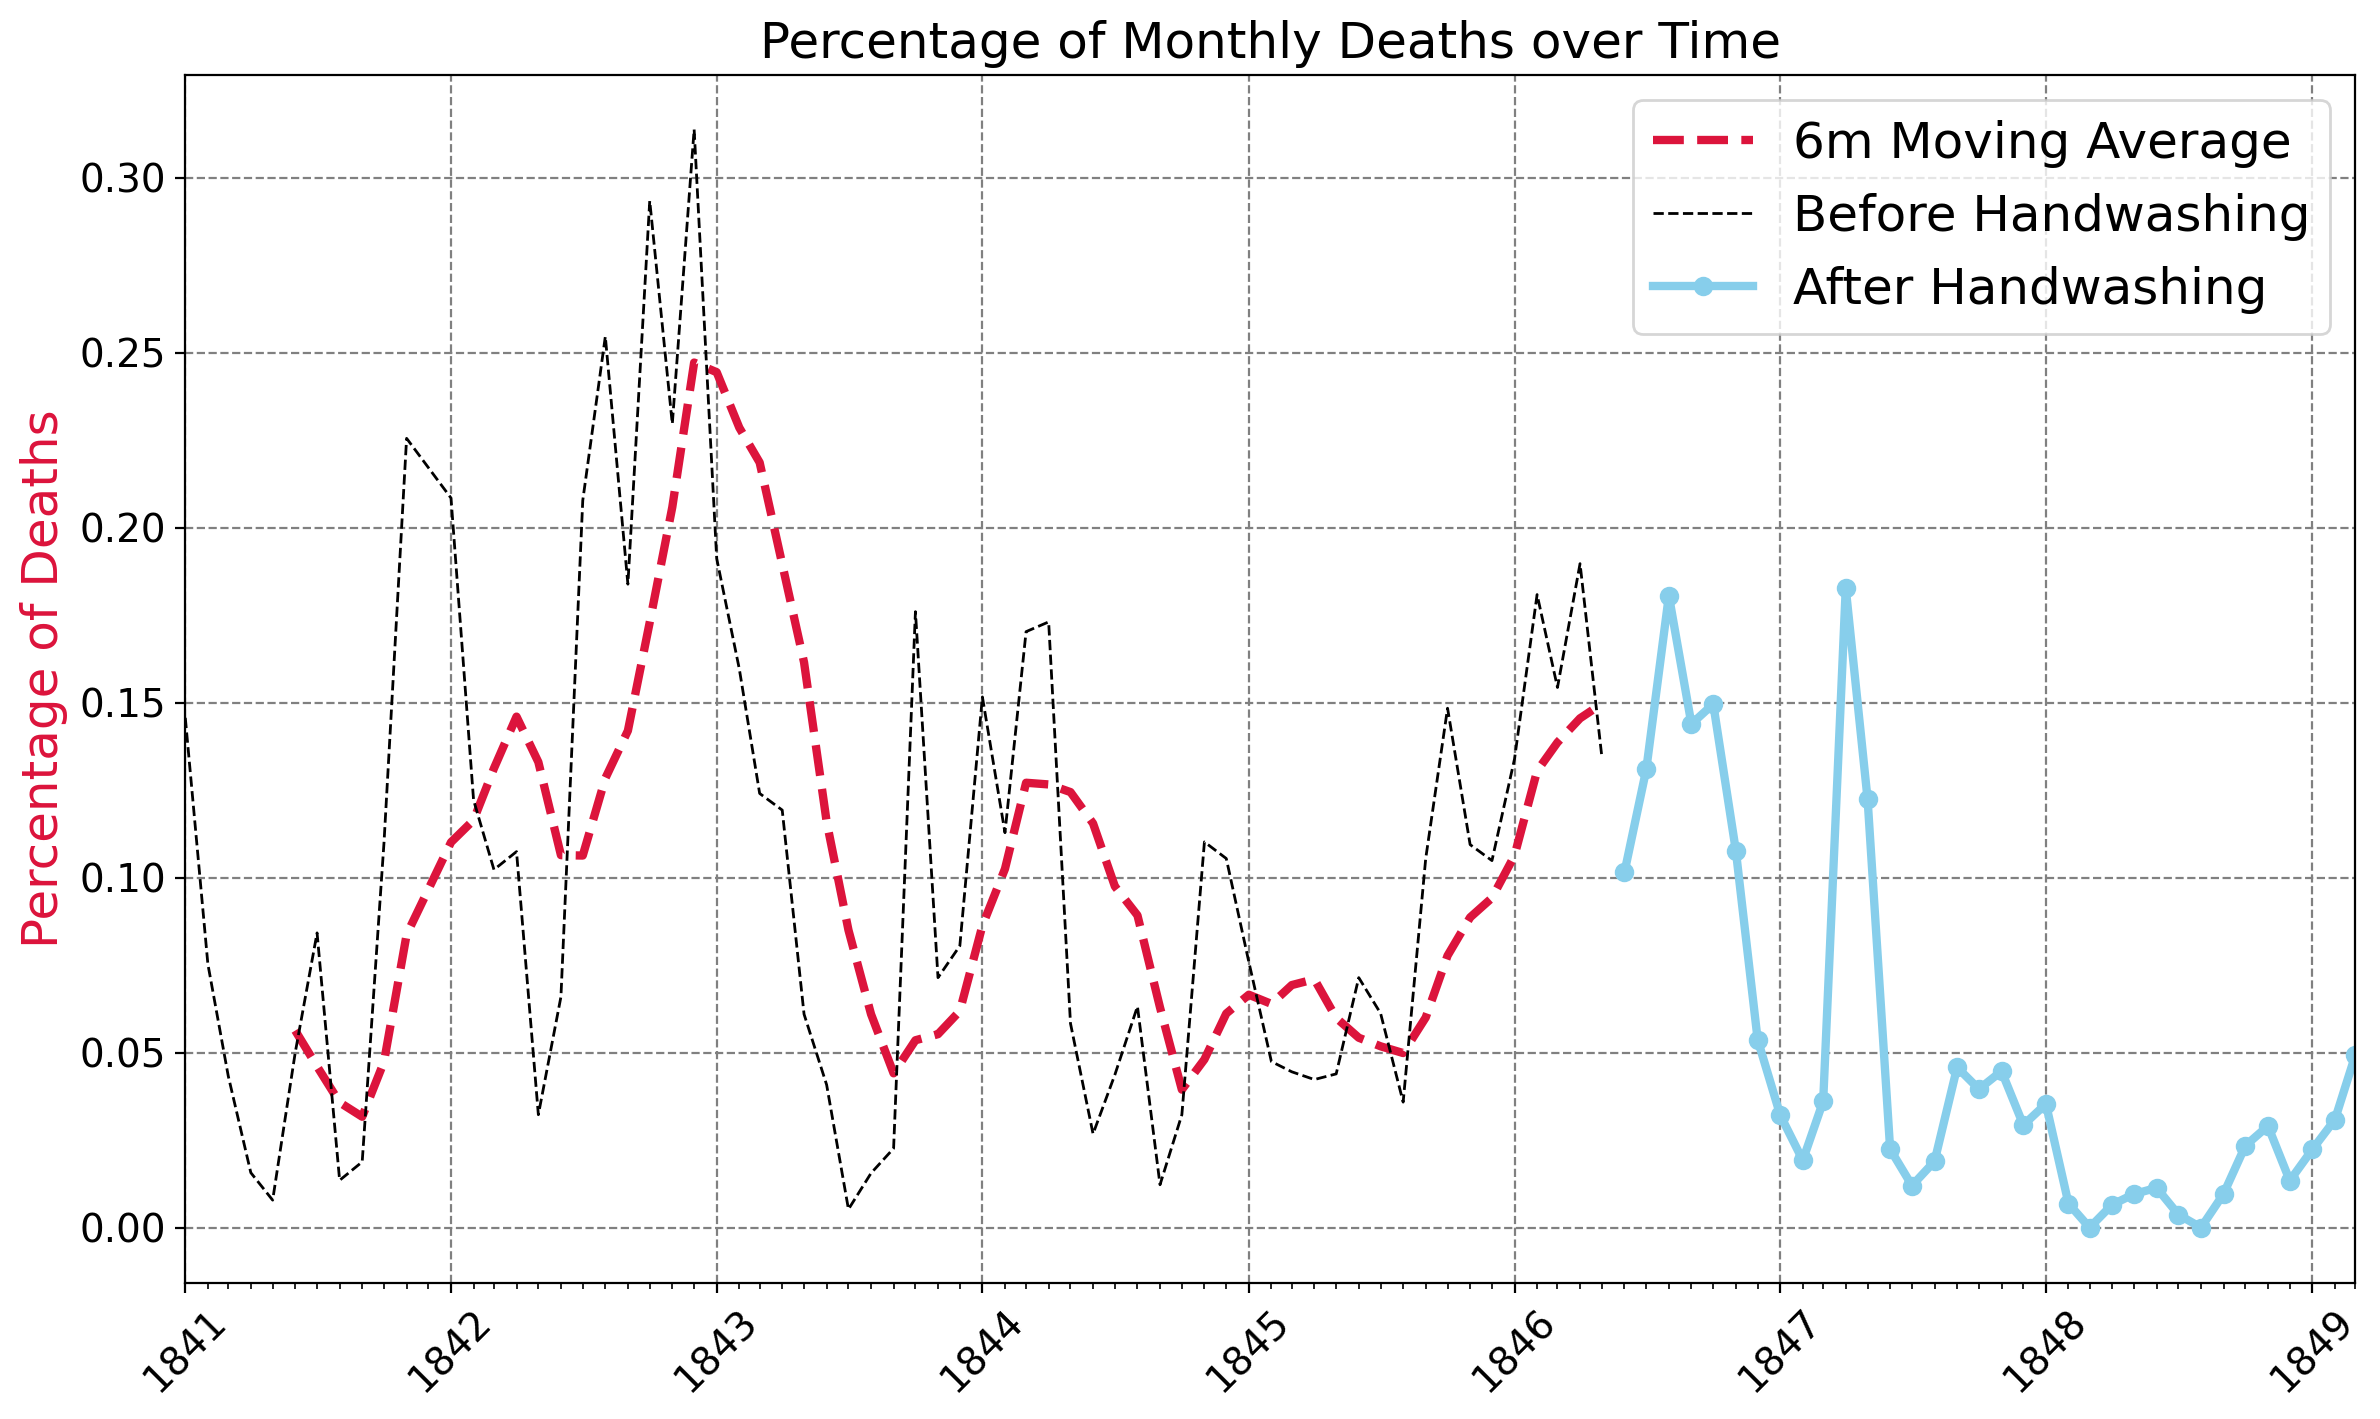

In [267]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Percentage of Monthly Deaths over Time', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
plt.ylabel('Percentage of Deaths', color='crimson', fontsize=18)
 
ax = plt.gca()

ax.xaxis.set_major_locator(years)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_formatter(years_fmt)

ax.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
 
plt.grid(color='grey', linestyle='--')
 
ma_line, = plt.plot(roll_df.index, 
                    roll_df.pct_deaths, 
                    color='crimson', 
                    linewidth=3, 
                    linestyle='--',
                    label='6m Moving Average')
bw_line, = plt.plot(before_washing.date, 
                    before_washing.pct_deaths,
                    color='black', 
                    linewidth=1, 
                    linestyle='--', 
                    label='Before Handwashing')
aw_line, = plt.plot(after_washing.date, 
                    after_washing.pct_deaths, 
                    color='skyblue', 
                    linewidth=3, 
                    marker='o',
                    label='After Handwashing')
 
plt.legend(handles=[ma_line, bw_line, aw_line], fontsize=18)
 
plt.show()

**What was the average percentage of monthly deaths before handwashing (i.e., before June 1847)**

In [268]:
avg_prob_before = before_washing.pct_deaths.mean() * 100
print(f'Chance of death during childbirth before handwashing: {avg_prob_before:.3}%.')
 
avg_prob_after = after_washing.pct_deaths.mean() * 100
print(f'Chance of death during childbirth AFTER handwashing: {avg_prob_after:.3}%.')
 
mean_diff = avg_prob_before - avg_prob_after
print(f'Handwashing reduced the monthly proportion of deaths by {mean_diff:.3}%!')
 
times = avg_prob_before / avg_prob_after
print(f'This is a {times:.2}x improvement!')

Chance of death during childbirth before handwashing: 10.5%.
Chance of death during childbirth AFTER handwashing: 5.07%.
Handwashing reduced the monthly proportion of deaths by 5.43%!
This is a 2.1x improvement!


**How the Death Rate Changed Before and After Handwashing?**

In [269]:
box = px.box(df_monthly, 
             x='discovered_handwashing', 
             y='pct_deaths',
             color='discovered_handwashing',
             title='How Have the Stats Changed with Handwashing?')
 
box.update_layout(xaxis_title='Washing Hands?',
                  yaxis_title='Percentage of Monthly Deaths',)
 
box.show()

The plot shows us the same data as our Matplotlib chart, but from a different perspective. Here we also see the massive spike in deaths in late 1842. Over 30% of women who gave birth that month died in hospital. 

In [270]:
hist = px.histogram(df_monthly, 
                   x='pct_deaths', 
                   color='discovered_handwashing',
                   nbins=30,
                   opacity=0.6,
                   barmode='overlay',
                   histnorm='percent',
                   marginal='box',)
 
hist.update_layout(xaxis_title='Proportion of Monthly Deaths',
                   yaxis_title='Count',)
 
hist.show()

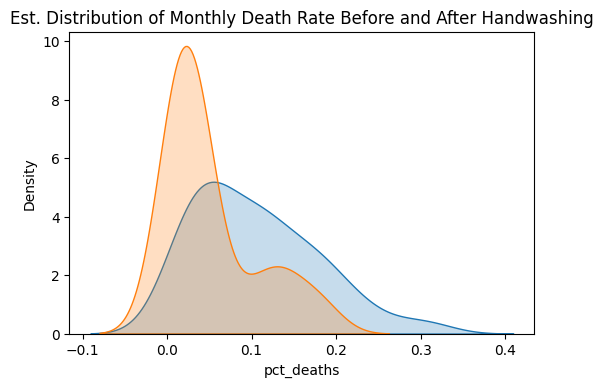

In [271]:
plt.figure(dpi=100)
# By default the distribution estimate includes a negative death rate!
sns.kdeplot(before_washing.pct_deaths, shade=True)
sns.kdeplot(after_washing.pct_deaths, shade=True)
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.show()

However, the problem is that we end up with a negative monthly death rate on the left tail. The solution is to specify a lower bound of 0 for the death rate.

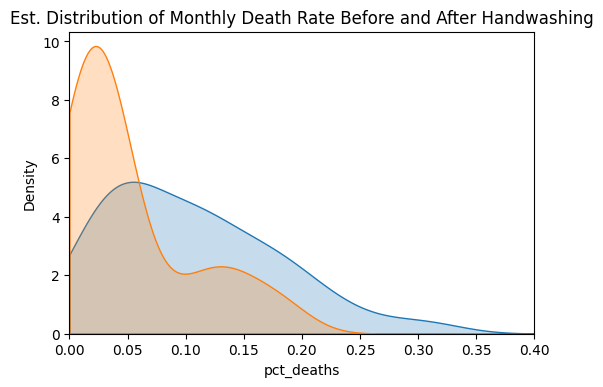

In [272]:
plt.figure(dpi=100)
sns.kdeplot(before_washing.pct_deaths, 
            shade=True,
            clip=(0,1))
sns.kdeplot(after_washing.pct_deaths, 
            shade=True,
            clip=(0,1))
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.xlim(0, 0.40)
plt.show()

Now that we have an idea of what the two distributions look like, we can further strengthen our argument for handwashing by using a statistical test. We can test whether our distributions ended up looking so different purely by chance (i.e., the lower death rate is just an accident) or if the 5.43% difference in the average death rate is statistically significant.


**Use a T-Test to Show Statistical Significance**

Use a t-test to determine if the differences in the means are statistically significant or purely due to chance.

If the p-value is less than 1% then we can be 99% certain that handwashing has made a difference to the average monthly death rate.

In [273]:
t_stat, p_value = stats.ttest_ind(a=before_washing.pct_deaths, 
                                  b=after_washing.pct_deaths)
print(f'p-palue is {p_value:.10f}')
print(f't-statstic is {t_stat:.4}')

p-palue is 0.0002504345
t-statstic is 3.804


When we calculate the p_value we see that it is 0.0000002509 or .00002509% which is far below even 1%. In other words, the difference in means is highly statistically significant and we can go ahead on publish our research paper .